`sketch001` is a really terrible notebook put together during the actual 1h hackathon/challenge.

it is awful because it barely has any structure and I've been away from this kind of things/code for almost a year and a half, which means I forgot some pretty basic stuff. but really really basic stuff.

this second notebook is my attempt to get (1) structure and (2) something working more or less quickly (ideally in under an hour). there is a version of a solution under `doc`, but I'll try not to pay any attention to that other than to copy all responses to start with tomorrow morning, right after my breakfast and before going to the wall for another 25 autobelay goes (or more). anyway, enough for tonight/today.

# Preparation

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
listings = pd.read_csv("./data/Edinburgh_AirBnb_listings_2.csv")
reviews = pd.read_csv("./data/Edinburgh_reviews_reduced.csv")

In [6]:
listings.head(3)

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.956892,-3.187677,Entire home/apt,80,3,14/11/2018,2.58,1,268
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,Meadows and Southside,55.942646,-3.184670,Entire home/apt,115,2,04/11/2018,1.73,2,66
2,33821,Stunning Central Edinburgh Festival Entire Flat,146109,Iona,Broughton North and Powderhall,55.964772,-3.189864,Entire home/apt,85,2,28/08/2018,2.02,2,122


In [7]:
reviews.head(3)

,listing_id,review_id,date,reviewer_id,reviewer_name,comments
0,15420,171793,18/01/2011,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,31/01/2011,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,19/04/2011,429751,Guido,I went to Edinburgh for the second time on Apr...


# Questions

## 1. How many listings are there for each room type?

In [10]:
listings.room_type.value_counts()

Entire home/apt    7366
Private room       4582
Shared room          37
Name: room_type, dtype: int64

## 2. What is the average price for Listings in each neighbourhood?

In [24]:
avg_prices = listings[['neighbourhood', 'price']].groupby(by='neighbourhood').mean()

#print(avg_prices.loc['Abbeyhill'])
avg_prices

,price
neighbourhood,
Abbeyhill,84.635870
Baberton and Juniper Green,81.928571
Balerno and Bonnington Village,68.866667
Balgreen and Roseburn,70.413333
"Barnton, Cammo and Cramond South",106.750000
"Bingham, Magdalene and The Christians",56.000000
"Blackford, West Mains and Mayfield Road",74.518182
Blackhall,76.363636
Bonaly and The Pentlands,79.777778


## 3. What is the distribution of minimum nights by room type?

room_type
Entire home/apt    [[Axes(0.125,0.125;0.775x0.755)]]
Private room       [[Axes(0.125,0.125;0.775x0.755)]]
Shared room        [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

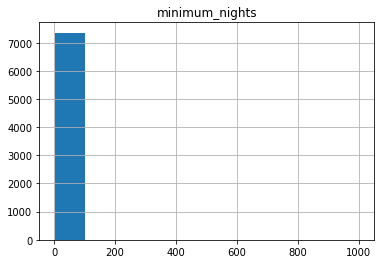

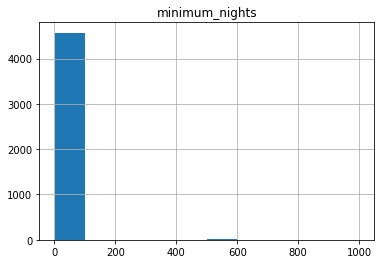

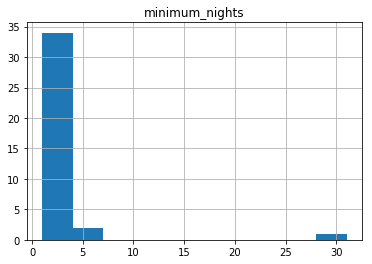

In [28]:
listings[['room_type', 'minimum_nights']].groupby('room_type').hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11407c8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118a31e10>]], dtype=object)

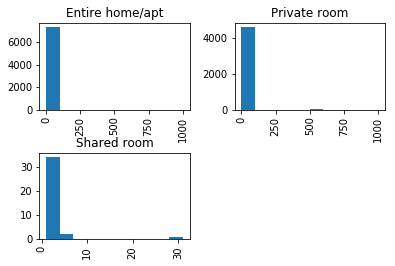

In [29]:
listings[['room_type', 'minimum_nights']].hist(by='room_type', bins=10)

But the choice plots in the answer are between 0 and 20.

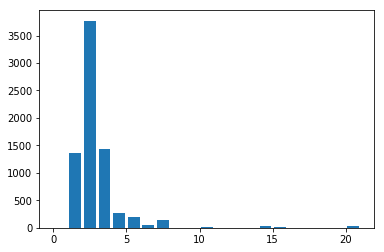

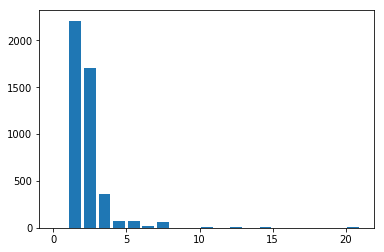

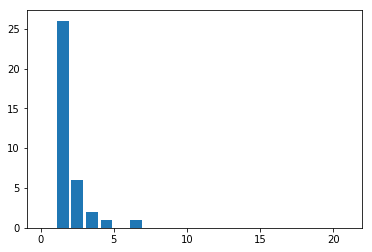

In [63]:
bins = np.linspace(0,21,22)
for room_type in listings.room_type.unique():
    hist, bin_edges = np.histogram(listings['minimum_nights'][listings.room_type == room_type], bins)
    plt.figure()
    plt.bar(((bins[:-1] + bins[1:])/2), hist)

I could have also used subplots and selected the different axes for each room type, via `plt.sca`.

## 4. How does the mean price of listings vary with the number of listings for each host?

(It took me 20 minutes to get here, with some help looking at the `matplotlib` functions).

In [91]:
data_listings = listings[['host_id', 'price']]
listings_number = data_listings.groupby('host_id').count()
listings_price = data_listings.groupby('host_id').mean()

In [116]:
mean_price_and_count = pd.merge(listings_price, listings_number,
                                left_index=True, right_index=True,
                                suffixes=('_mean', '_count'))

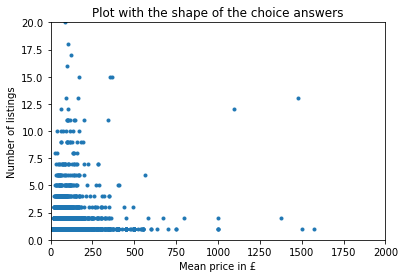

In [117]:
plt.plot(mean_price_and_count['price_mean'],
        mean_price_and_count['price_count'],
        '.')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.xlabel('Mean price in £')
plt.ylabel('Number of listings')
plt.title('Plot with the shape of the choice answers');

The Pandas version I was using until now was a bit outdated (`0.20.1` as per `pd.__version__`). This means that `merge` doesn't work on named Series, which explains why my code is different than the suggested solution.

**May 5, 2017**, go figure. That must be the last time I did something "for real" with Pandas.

# 5. What is the cumulative percentage of the number of listings per host, ranked from most to fewest?

(27 minutes to go)

In [140]:
pd.__version__

'0.20.1'

In [138]:
a=df.groupby('Animal', as_index=False).sum()
a

,Animal,Max Speed
0,Falcon,750.0
1,Parrot,50.0
